In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt

In [ ]:
!git clone https://github.com/zaza-ipynb/Data-Mining-Cup-2019.git
!unzip -o Data-Mining-Cup-2019/dmc.zip

fatal: destination path 'Data-Mining-Cup-2019' already exists and is not an empty directory.
Archive:  Data-Mining-Cup-2019/dmc.zip
  inflating: DMC_2019_task/DATA-MINING-CUP-2019-features.pdf  
  inflating: DMC_2019_task/DATA-MINING-CUP-2019-task.pdf  
  inflating: DMC_2019_task/test.csv  
  inflating: DMC_2019_task/train.csv  


In [ ]:
data=pd.read_csv('DMC_2019_task/train.csv', sep='|')
test=pd.read_csv('DMC_2019_task/test.csv', sep='|')
real = pd.read_csv('Data-Mining-Cup-2019/DMC-2019-realclass.csv', sep='|')

In [ ]:
data.shape,test.shape,real.shape

((1879, 10), (498121, 9), (498121, 1))

### Data Overview

In [ ]:
data.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [ ]:
test.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526


In [ ]:
real.head()

,fraud
0,0
1,0
2,0
3,0
4,0


#### Class Distribution & Analysis of Data Charakteristic

In [ ]:
print('fraud :',(data['fraud'] == 1).sum())
print('Not Fraud :', (data['fraud']==0).sum())
print('Persentage Fraud :', len(data[data.fraud==1])/len(data)*100, '%')
print('Persentage Not Fraud :',len(data[data.fraud==0])/len(data)*100, '%')

fraud : 104
Not Fraud : 1775
Persentage Fraud : 5.534858967535923 %
Persentage Not Fraud : 94.46514103246408 %


<Axes: title={'center': 'Distribusi'}>

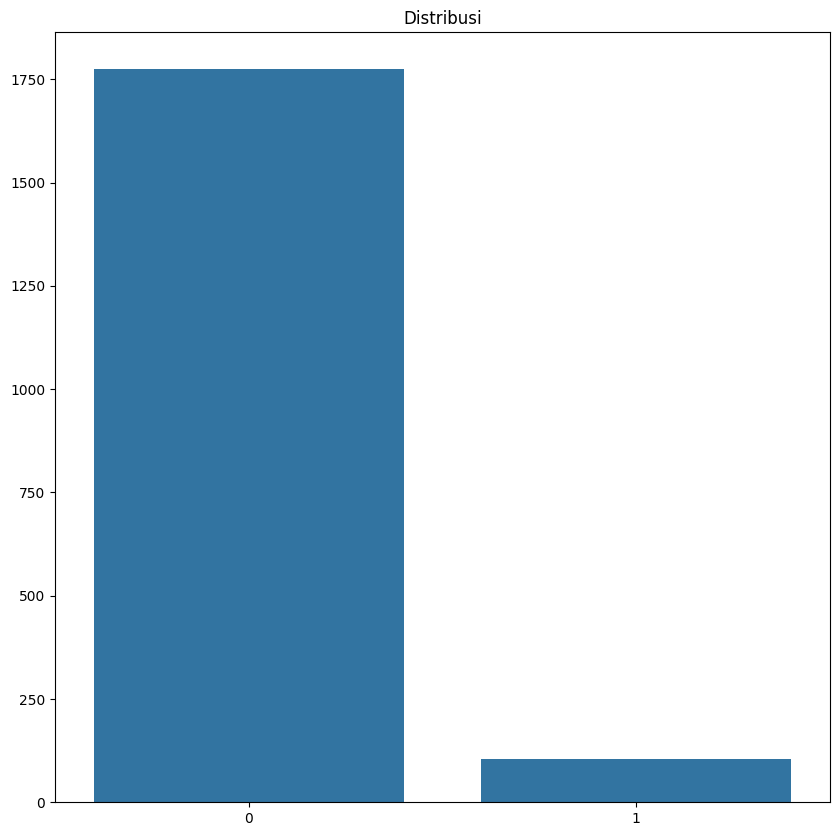

In [ ]:
count=[data[data.fraud==0].count()[0], data[data.fraud==1].count()[0]]
plt.figure(figsize=(10,10))
plt.title('Distribusi')
sns.barplot(x=[0,1],y=count)

Distribusi observasi sangat tidak seimbang. Ini dapat menyebabkan situasi ketika model akan belajar untuk mengklasifikasikan semua contoh sebagai negatif yang akan menghasilkan akurasi tinggi dengan nilai aktual nol.

Sebelum melihat klasifikasi, mari kita selidiki fitur-fiturnya.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   trustLevel                 1879 non-null   int64  
 1   totalScanTimeInSeconds     1879 non-null   int64  
 2   grandTotal                 1879 non-null   float64
 3   lineItemVoids              1879 non-null   int64  
 4   scansWithoutRegistration   1879 non-null   int64  
 5   quantityModifications      1879 non-null   int64  
 6   scannedLineItemsPerSecond  1879 non-null   float64
 7   valuePerSecond             1879 non-null   float64
 8   lineItemVoidsPerPosition   1879 non-null   float64
 9   fraud                      1879 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 146.9 KB


In [ ]:
data.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


#### Distribusi Fitur

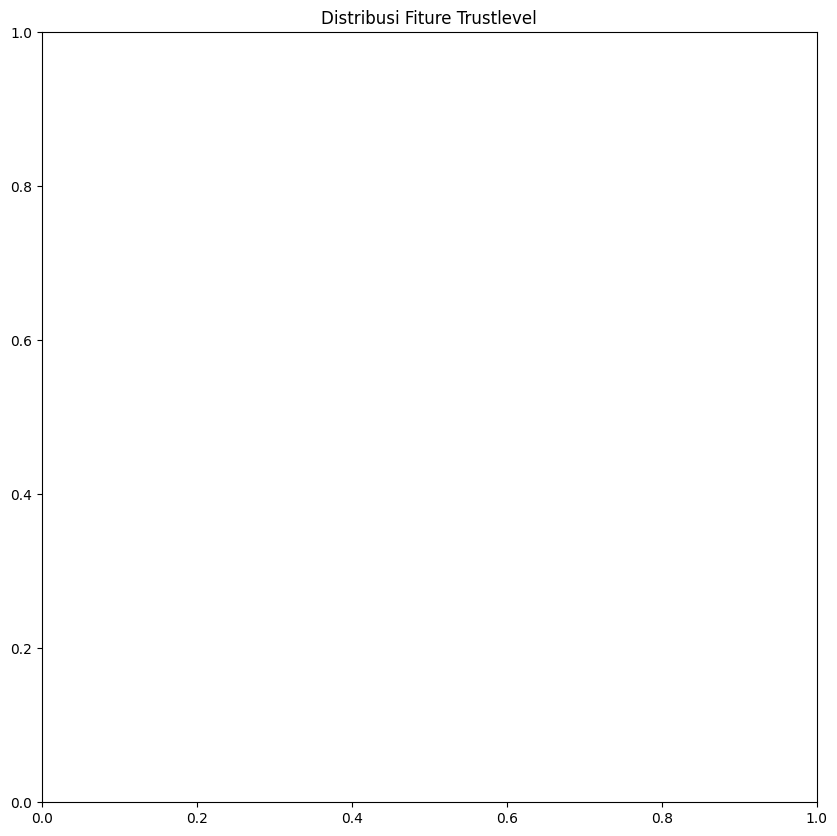

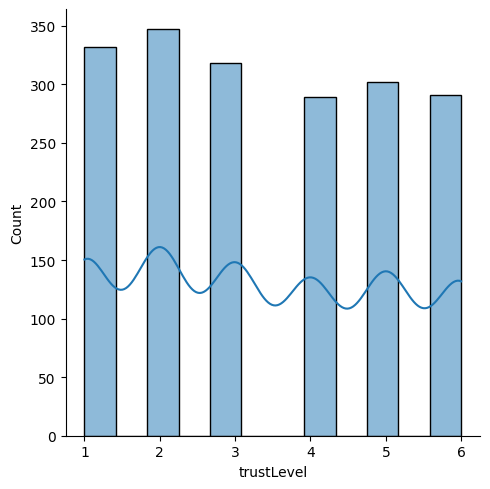

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Distribusi Fiture Trustlevel')
sns.displot(data.trustLevel,kde=True)

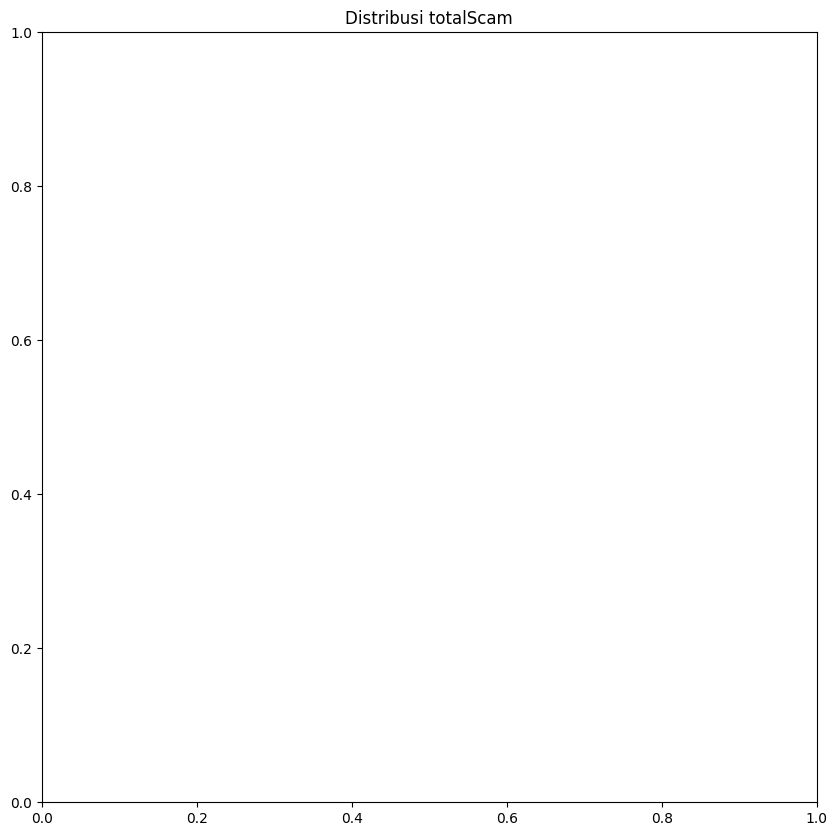

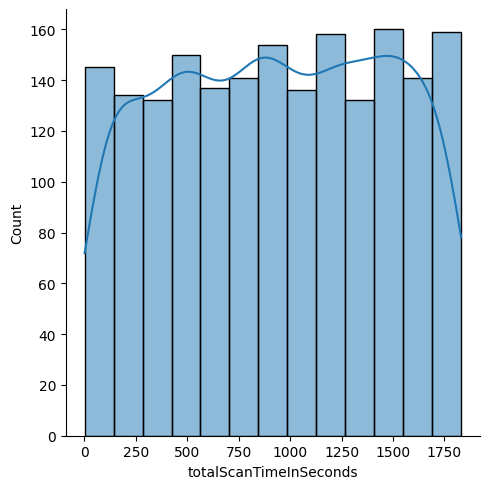

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Distribusi totalScam')
sns.displot(data.totalScanTimeInSeconds,kde=True)

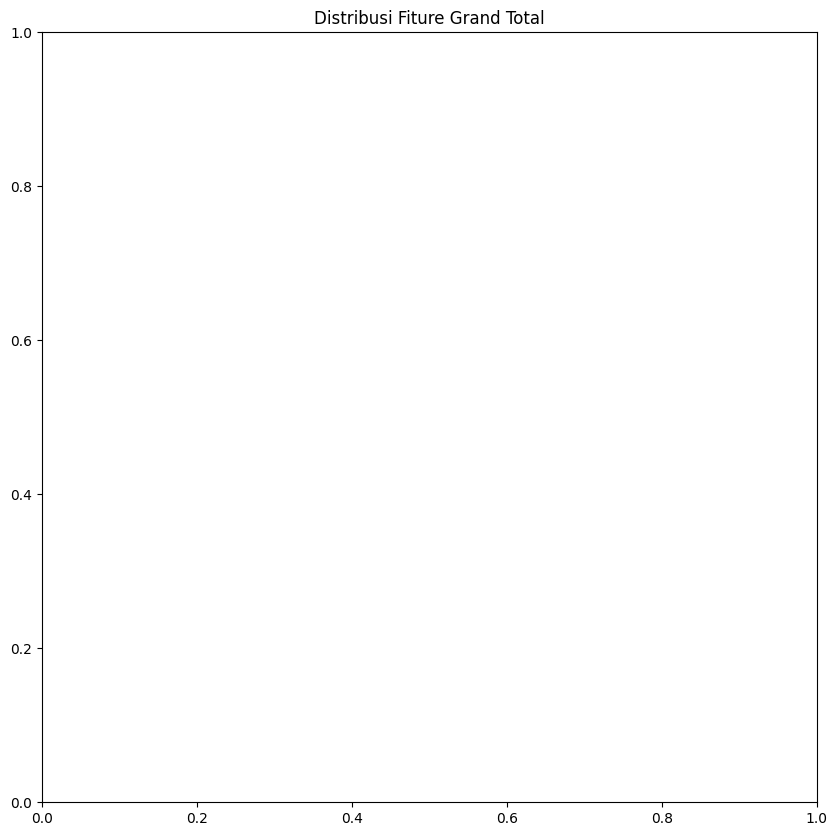

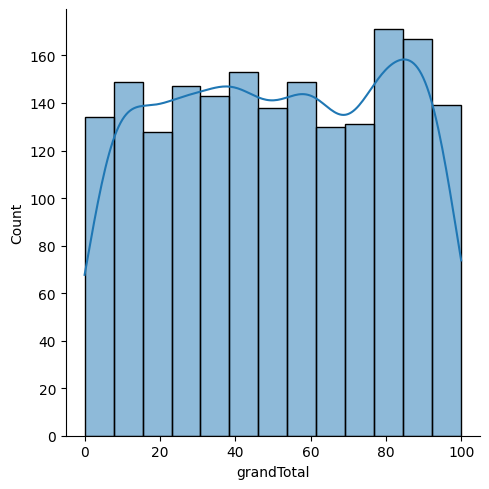

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Distribusi Fiture Grand Total')
sns.displot(data.grandTotal,kde=True)

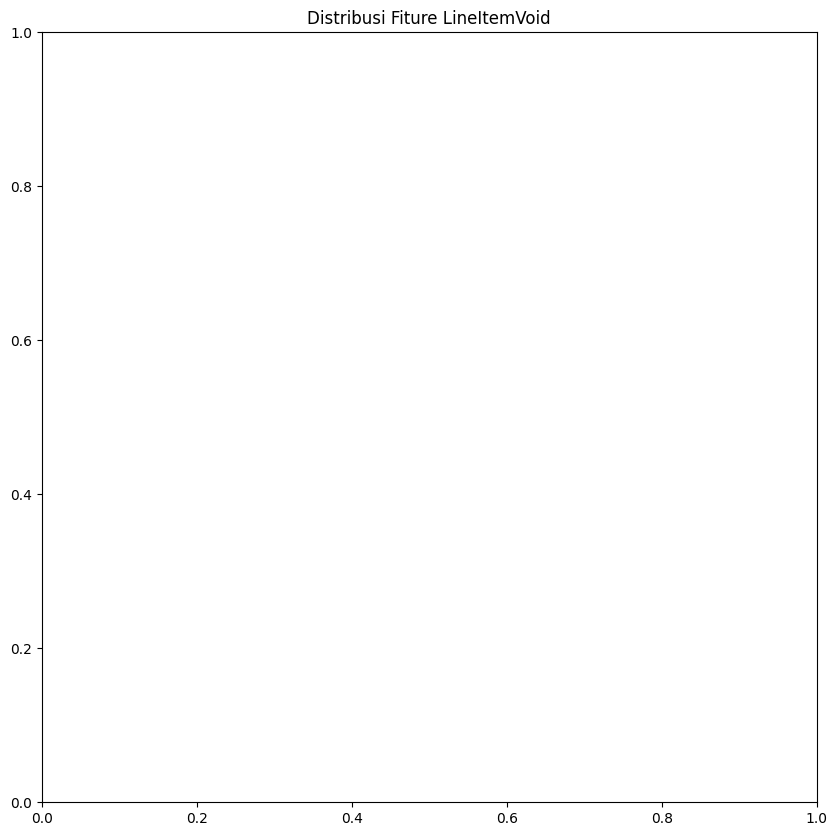

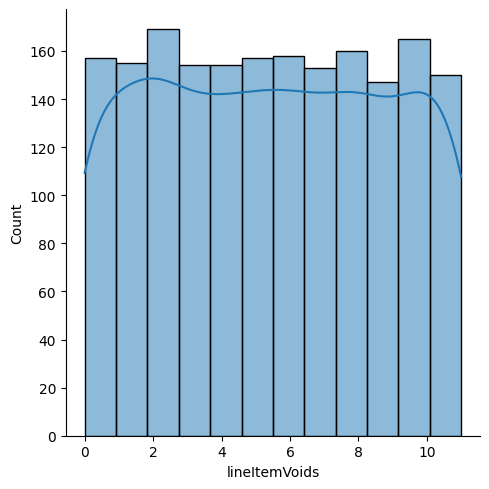

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Distribusi Fiture LineItemVoid')
sns.displot(data.lineItemVoids,kde=True)

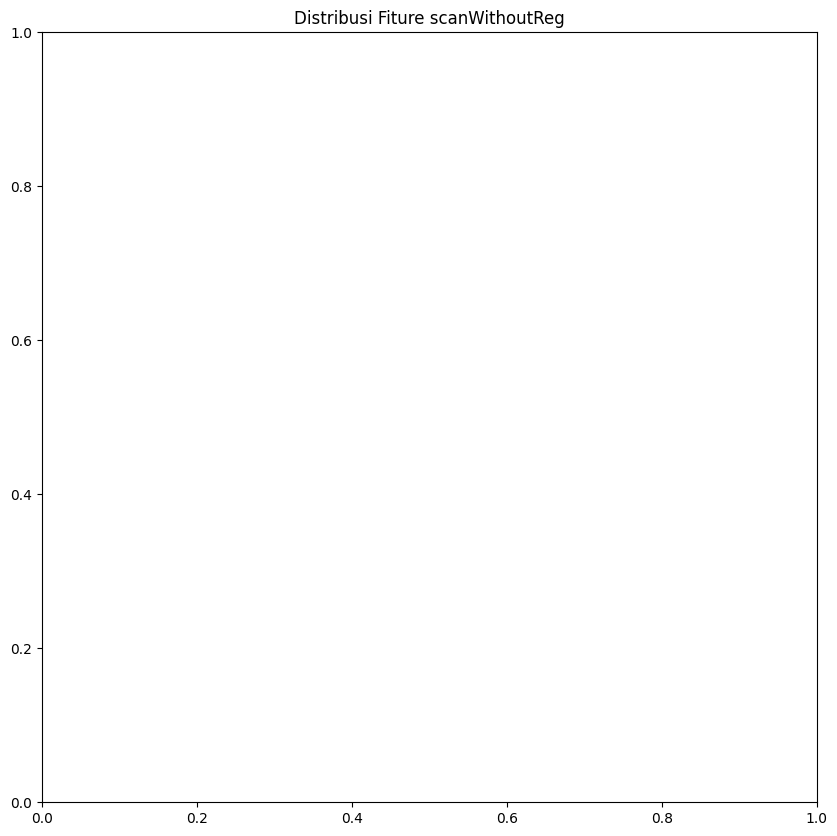

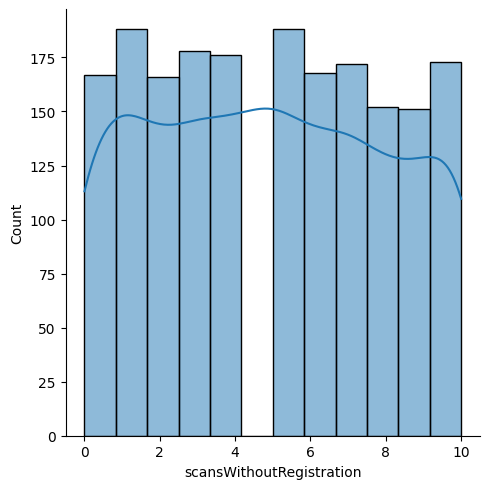

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Distribusi Fiture scanWithoutReg')
sns.displot(data.scansWithoutRegistration,kde=True)

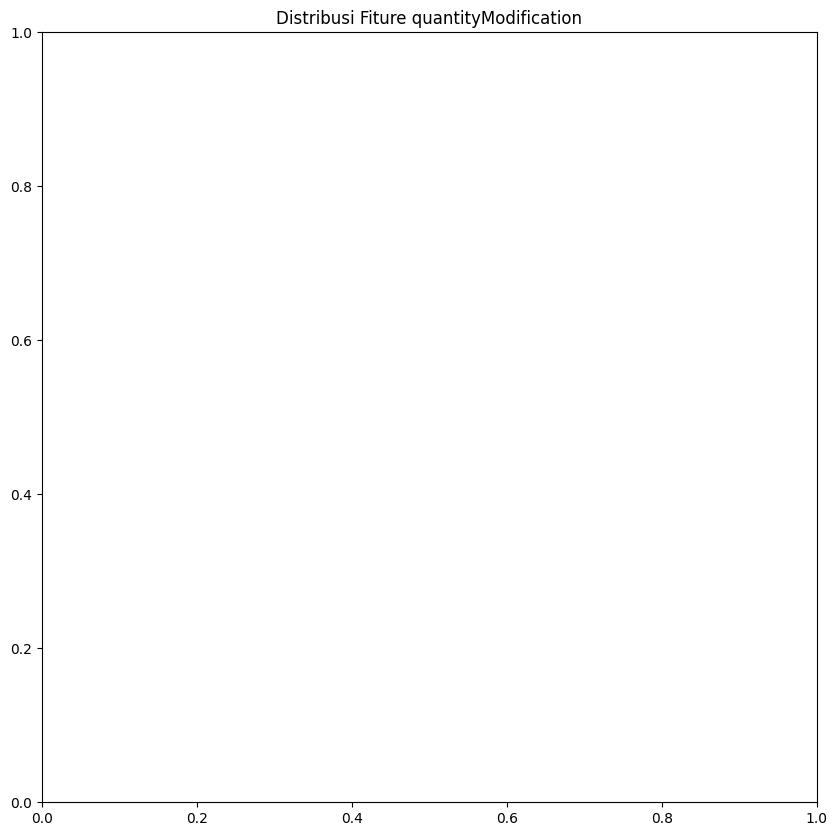

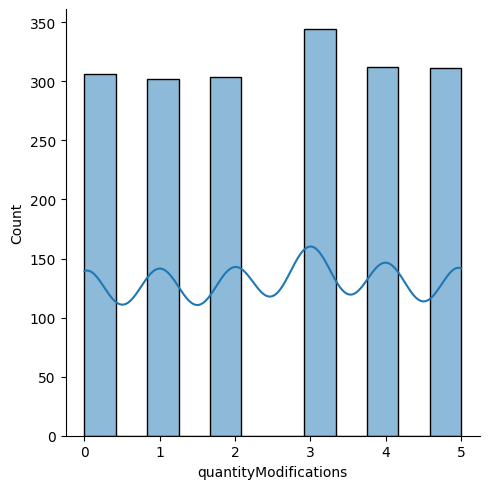

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Distribusi Fiture quantityModification')
sns.displot(data.quantityModifications,kde=True)

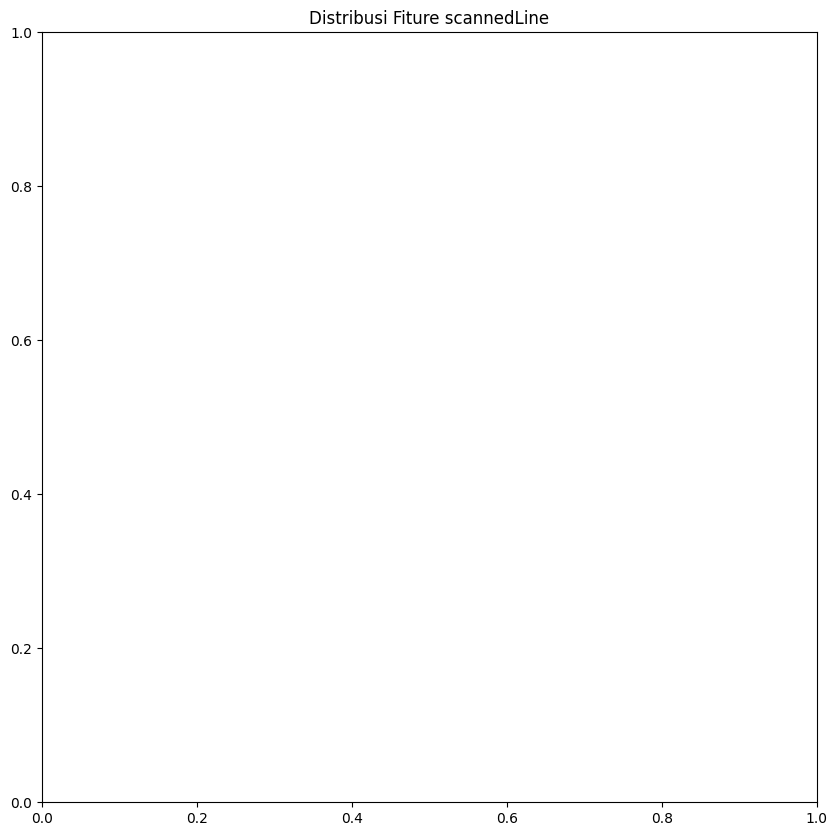

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Distribusi Fiture scannedLine')
sns.displot(data.scannedLineItemsPerSecond,kde=True)

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Distribusi Fiture value Per Second')
sns.displot(data.valuePerSecond,kde=True)

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Distribusi Fiture lineItem')
sns.displot(data.lineItemVoidsPerPosition,kde=True, rug=True)

Distribusi beberapa fitur agak teratur dan datar di seluruh spektrum nilai sedangkan untuk fitur lainnya sangat condong ke sisi kiri.

In [ ]:
matrix=data.corr()
mask=np.zeros_like(matrix)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
  plt.figure(figsize=(8,8))
  plt.title("Feature Corr")
  sns.heatmap(matrix,mask=mask,square=True)

In [ ]:
data.corr().fraud

Tidak banyak yang terjadi dalam heatmap correlation. Selain fitur yang jelas berkorelasi (seperti valuePerSecond dan scannedLineItemsPerSecond) kami tidak mengamati nilai yang signifikan. Waktu pemindaian berkorelasi negatif dengan kecepatan pemindaian dan sedikit korelasi negatif dapat diamati antara trustLevel dan kelas yang ditugaskan. Mari kita lihat lebih dekat fitur trustLevel.

<h1> TrustLevel </h1>
Tampaknya trustlevel tidak berkorelasi secara signifikan dengan nilai kelas tetapi mungkin disebabkan oleh distribusi antar kelas yang sangat tidak merata. Mungkin menguntungkan untuk memeriksa bagaimana fitur ini didistribusikan di antara transaksi fraud dan non-fraud secara terpisah.

In [ ]:
figure=plt.figure(figsize=(8,8))
ax1=figure.add_subplot(121)
ax2=figure.add_subplot(122)
ax1.set_title('Distribusi trust dalam fraud transaction')
ax2.set_title('Histogram trust dalam fraud')
sns.distplot(data[data['fraud']==1].trustLevel,kde=True,ax=ax1)
sns.distplot(data[data['fraud']==1].trustLevel,kde=False,ax=ax2)

Nilai fitur trustLevel yang unik di antara transaksi penipuan-postive.

In [ ]:
data[data['fraud']==1].trustLevel.unique()

Tampaknya korelasi mungkin telah hilang dalam noise/outliers yang disebabkan oleh distribusi data. Dalam subgroup transaksi fraud, hanya trustlevel 1 dan 2 yang muncul.

In [ ]:
figure=plt.figure(figsize=(8,8))
ax1=figure.add_subplot(121)
ax2=figure.add_subplot(122)
ax1.set_title('Distribusi trust dalam non fraud transaction')
ax2.set_title('Histogram trust dalam non fraud')
sns.distplot(data[data['fraud']==0].trustLevel,kde=True,ax=ax1)
sns.distplot(data[data['fraud']==0].trustLevel,kde=False,ax=ax2)

Nilai fitur trustLevel yang unik di antara transaksi fraud-negatif.

In [ ]:
data[data['fraud']==0].trustLevel.unique()

Dalam kasus transaksi non-fraud, distibusinya lebih merata. Meskipun ada penurunan yang signifikan dari transaksi dengan trustlevel sama dengan 1. trustLevel dapat menjadi indikator yang baik apakah klien meminta cek lanjutan tetapi tidak pada akhirnya membedakan transaksi fraud dan non-fraud.

### Pembuatan subset data, Preprocessing, Feature Engineering

Membuat fitur baru (feature engineering dengan list comprehension yaitu total items yaitu jumlah keseluruhan barang dalam satu transaksi) dan percobaan downsampling agar kelas seimbang

In [ ]:
from tqdm import tqdm

data['TotalItemsScanned'] = [data.iloc[i].totalScanTimeInSeconds * data.iloc[i].scannedLineItemsPerSecond for i in tqdm(range(len(data)))]
test['TotalItemsScanned'] = [test.iloc[i].totalScanTimeInSeconds * test.iloc[i].scannedLineItemsPerSecond for i in tqdm(range(len(test)))]


100%|██████████| 1879/1879 [00:00<00:00, 5830.02it/s]

100%|██████████| 498121/498121 [01:40<00:00, 4952.63it/s]
